In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

In [2]:
higgs_bosson_train = pd.read_csv('train.csv')
higgs_bosson_test = pd.read_csv('test.csv')

X = higgs_bosson_train.drop(columns=['label'])
y = higgs_bosson_train['label']

# Data Preprocessing

Check for correlations and feature importances

In [3]:
# Check values
print(higgs_bosson_train.describe())

# Check null values
higgs_bosson_train.info()

              label            f0            f1            f2            f3  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean       0.531300      0.991232     -0.006811     -0.000732      0.993825   
std        0.499024      0.564973      1.007311      1.008880      0.595426   
min        0.000000      0.274697     -2.434976     -1.742508      0.003158   
25%        0.000000      0.592950     -0.745140     -0.871931      0.572091   
50%        1.000000      0.855385     -0.009794      0.005410      0.888489   
75%        1.000000      1.234579      0.732370      0.873213      1.291927   
max        1.000000      7.000281      2.431946      1.743236      6.582300   

                 f4            f5            f6            f7            f8  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean      -0.008596      0.987553     -0.006254     -0.002803      0.995464   
std        1.006594      0.471304      1.011110    

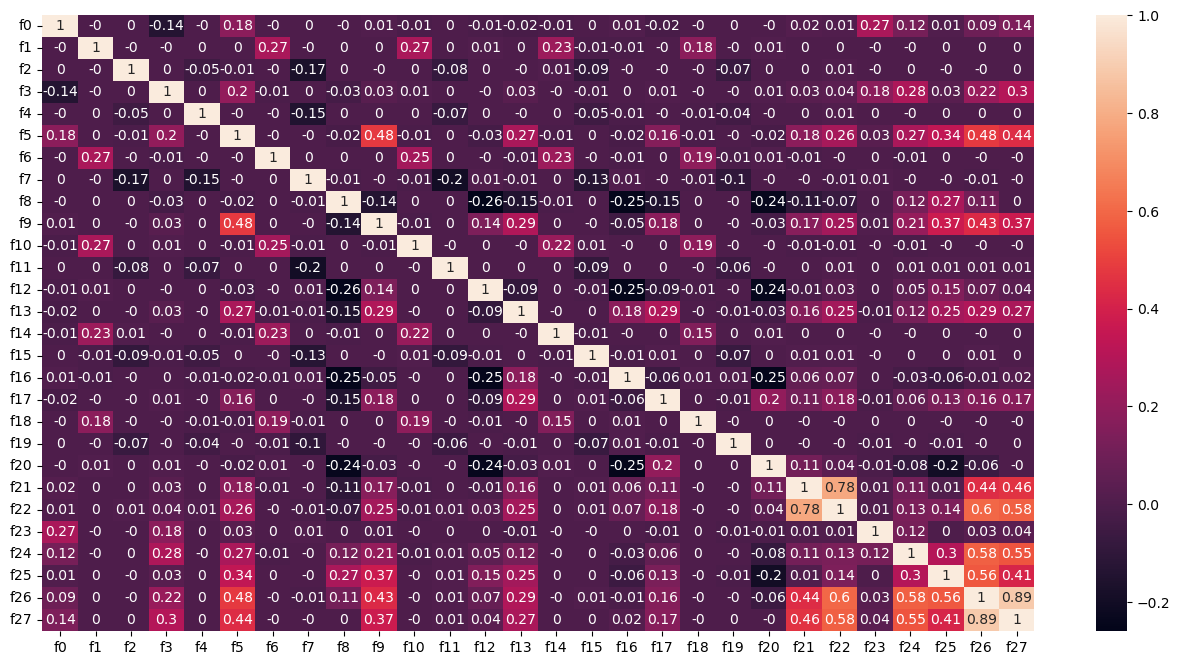

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=([16,8]))
matrix = X.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()

# Model Generalization

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

In [45]:

xgBoost = xgb.XGBClassifier()
xgBoost.fit(X_train, 
            y_train, 
            verbose=True,
            early_stopping_rounds=10,
            eval_metric='auc',
            eval_set=[(X_test, y_test)])
print(f'XGBoost Accuracy: {xgBoost.score(X_test, y_test)}')
# print(f'Cross Val Accuracy: {np.mean(cross_val_score(xgBoost, X_train, y_train, cv=5))}')

[0]	validation_0-auc:0.73213
[1]	validation_0-auc:0.74682


C:\Users\user\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:889: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\user\AppData\Roaming\Python\Python39\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-auc:0.75352
[3]	validation_0-auc:0.75955
[4]	validation_0-auc:0.76447
[5]	validation_0-auc:0.76888
[6]	validation_0-auc:0.77266
[7]	validation_0-auc:0.77579
[8]	validation_0-auc:0.77805
[9]	validation_0-auc:0.77955
[10]	validation_0-auc:0.78090
[11]	validation_0-auc:0.78188
[12]	validation_0-auc:0.78334
[13]	validation_0-auc:0.78373
[14]	validation_0-auc:0.78557
[15]	validation_0-auc:0.78632
[16]	validation_0-auc:0.78609
[17]	validation_0-auc:0.78692
[18]	validation_0-auc:0.78730
[19]	validation_0-auc:0.78713
[20]	validation_0-auc:0.78754
[21]	validation_0-auc:0.78786
[22]	validation_0-auc:0.78798
[23]	validation_0-auc:0.78815
[24]	validation_0-auc:0.78794
[25]	validation_0-auc:0.78777
[26]	validation_0-auc:0.78764
[27]	validation_0-auc:0.78727
[28]	validation_0-auc:0.78811
[29]	validation_0-auc:0.78854
[30]	validation_0-auc:0.78835
[31]	validation_0-auc:0.78835
[32]	validation_0-auc:0.78870
[33]	validation_0-auc:0.78883
[34]	validation_0-auc:0.78902
[35]	validation_0-

<AxesSubplot:>

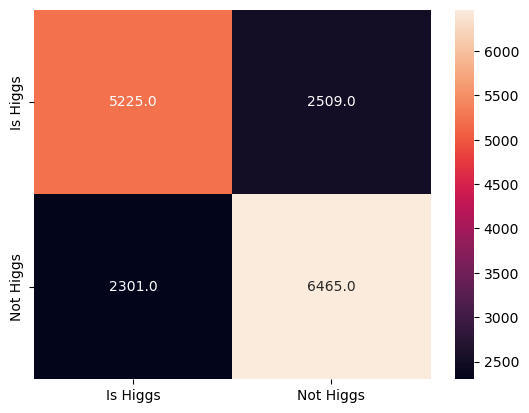

In [6]:
from sklearn.metrics import confusion_matrix

xgBoost = xgb.XGBClassifier()
xgBoost.fit(X_train, y_train)
generalized_predicted = xgBoost.predict(X_test)
confusionM = confusion_matrix(y_test, generalized_predicted)
sns.heatmap(confusionM, annot=True, xticklabels=['Is Higgs', 'Not Higgs'], yticklabels=['Is Higgs', 'Not Higgs'], fmt='.1f')
# plt.show()

<AxesSubplot:>

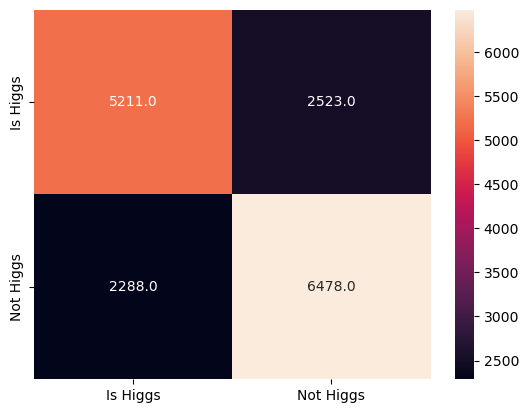

In [7]:
randomF = RandomForestClassifier()
randomF.fit(X_train, y_train)
generalized_predicted = randomF.predict(X_test)
confusionM = confusion_matrix(y_test, generalized_predicted)
sns.heatmap(confusionM, annot=True, xticklabels=['Is Higgs', 'Not Higgs'], yticklabels=['Is Higgs', 'Not Higgs'], fmt='.1f')

# Hyperparameter Tuning and CV

In [198]:
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# max_depth: higher = overfit
# max_leaves: higher = overfit

parameters = {
#     'learning_rate': [0.1, 0.15, 0.20, 0.25],
#     'learning_rate': [0.1, 0.20],
#     'max_depth': [2, 3, 5, 10, 15],
#     'max_leaves': [2, 3, 5, 10, 15],
#     'subsample': [0.5, 0.75, 1],
#     'colsample_bytree': [0.5, 0.75, 1],
    'n_estimators': [100, 120, 125, 130]
#     'gamma': [0, 0.25, 1.0],
#     'reg_lambda': [0, 1.0, 10.0],
}

xgBoost = xgb.XGBClassifier(eval_metric=metrics.roc_auc_score, **test_param)
# xgBoost.fit(X=X_train, 
#             y=y_train, 
#             verbose=True,
#             eval_set=[(X_test, y_test)])

grid_cv = GridSearchCV(xgBoost, parameters, cv=3)
grid_cv.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None, colsample_bytree=1,
                                     device=None, early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric=<function roc_auc_score at 0x000002085CEC1310>,
                                     feature_types=None, gamma=1.0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.225, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_

In [205]:
# testing early stopping
test_param = {'colsample_bytree': 1,
 'learning_rate': 0.225,
 'max_depth': 5,
 'max_leaves': 15,
 'n_estimators': 130,
#               0
 'subsample': 1,
 'gamma': 1.0, 'reg_lambda': 10.0
             }
xgBoost = xgb.XGBClassifier(**test_param, eval_metric=metrics.roc_auc_score)
xgBoost.fit(X=X_train, y=y_train)
np.mean(cross_val_score(xgBoost, X_train, y_train))
# xgBoost.score(X_test, y_test)
# 0.0.7140749999999999

0.7158750000000002

In [199]:
best_params = grid_cv.best_params_
best_params
# randomSearch.best_score_

{'n_estimators': 130}

<AxesSubplot:>

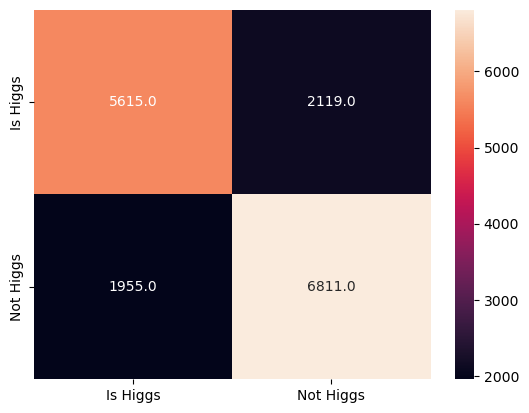

In [201]:
xgBoost = xgb.XGBClassifier(**test_param)
xgBoost.fit(X_train, y_train)
generalized_predicted = xgBoost.predict(X_test)
confusionM = confusion_matrix(y_test, generalized_predicted)
sns.heatmap(confusionM, annot=True, xticklabels=['Is Higgs', 'Not Higgs'], yticklabels=['Is Higgs', 'Not Higgs'], fmt='.1f')

In [113]:
xgBoost.score(X_test, y_test)

0.7418181818181818

# Submission

In [54]:
sum(y_train)/len(y_train)
# y_train

0.5313134328358209

In [55]:
sum(y_test)/len(y_test)

0.5312727272727272

Validation AUROC: 0.793437161522451


Text(0, 0.5, 'True Positive Rate')

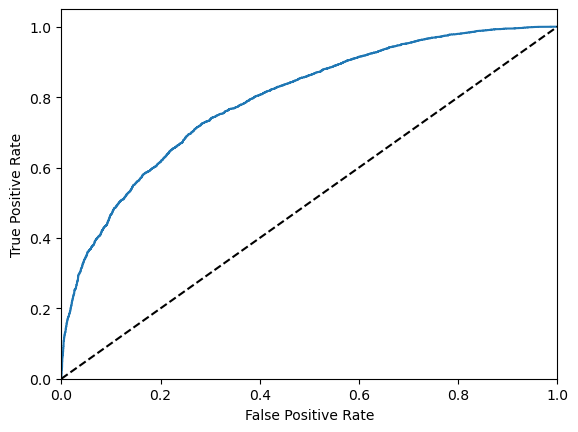

In [206]:
train_csv = pd.read_csv('train.csv')

X_valid = train_csv[40000:]
X_train = train_csv[:40000]
y_train = X_train['label']
y_valid = X_valid['label']
X_valid = X_valid.drop(columns='label')
X_train = X_train.drop(columns='label')
# X_train = X_train.drop(columns='label')
# X_train.shape
# X_valid
# X_train
y_valid.shape
xgBoost = xgb.XGBClassifier(**test_param)
xgBoost.fit(X_train, y_train)
# randomF = RandomForestClassifier()
# randomF.fit(X_train, y_train)
pred = xgBoost.predict_proba(X_valid)[:,1]

# Compute AUROC.
val = metrics.roc_auc_score(y_valid, pred)
print(f'Validation AUROC: {val}' )

# Plot ROC curve.
fpr, tpr, thresholds = metrics.roc_curve(y_valid, pred)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], color='k', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Validation AUROC: 0.787893727375871
# 0.7907767360280327

In [92]:
# pred = xgBoost.predict_proba(higgs_bosson_test)[:,1:2]
pred = xgBoost.predict_proba(higgs_bosson_test)[:,1:2]
submission_test = higgs_bosson_test.copy()

# submission_test['Predicted'] = pred
# submission_test['Id'] = np.arange(0,50000)
# submission_df = submission_test[['Predicted']].rename_axis('Id')
# submission_df.dtypes
# submission_df.to_csv('submission.csv')
# submission_test['Predicted'].values

submission = np.hstack((np.arange(submission_test.shape[0]).reshape(-1,1), pred)) # Add Id column.
np.savetxt(fname='submission.csv', X=submission, header='Id,Predicted', delimiter=',', comments='')

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
        0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
        0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
        0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
        0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
        0.99]),)